# SIGN BOARD DETECTION USING COMPUTER VISION

## Importing Libraries

In [ ]:
import cv2
import numpy as np
from sklearn import svm
import os
import pickle
from imutils import paths
import matplotlib.pyplot as plt

## Reading the Dataset

In [ ]:
# Defining the dataset folder and sign names
dataset_folder = 'Dataset'
sign_names = ["CONSTRUCTION AHEAD","LEFT EXIT","NO ENTRY","RIGHT TURN","SIGNAL AHEAD","SPEED LIMIT 50","STOP","TRUCK"]

# Initializing lists to store sign images and corresponding labels
signs = []
labels = []

# Using imutils to list image paths in the dataset folder
image_paths = list(paths.list_images(dataset_folder))

# Loading sign images from the dataset folder
for image_path in image_paths:
    image = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)

    if image is not None:
        image = cv2.resize(image, (64, 128) )  # Resize images using OpenCV
        signs.append(image)
        labels.append(sign_names.index(os.path.basename(os.path.dirname(image_path))))

## Applying HOG and SVM

In [ ]:
# Feature extraction using HOG
hog_features = []

for sign in signs:
    hog = cv2.HOGDescriptor()
    hog_descriptor = hog.compute(sign)
    hog_features.append(hog_descriptor)

# Preparing data for training
hog_features = np.array(hog_features)
labels = np.array(labels)

# Training an SVM classifier
clf = svm.SVC(gamma=0.001, C=100)
clf.fit(hog_features, labels)

# Saving the trained model
with open("trained_model.pkl", "wb") as model_file:
    pickle.dump(clf, model_file)

print("Training complete. Model saved as trained_model.pkl")

Training complete. Model saved as trained_model.pkl


## Using the Trained Model

In [ ]:
# Function to detect and classify a sign using the trained model
def detect_and_classify_sign(image, clf):
    # Preprocessing the input image
    if len(image.shape) == 3:
        image_gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    else:
        image_gray = image
    image_gray = cv2.resize(image_gray, (64, 128))  # Resizing

    # Extracting HOG features
    hog = cv2.HOGDescriptor()
    hog_descriptor = hog.compute(image_gray).reshape(1, -1)

    # Using the trained SVM model to predict the sign
    predicted_label = int(clf.predict(hog_descriptor)[0])

    # Getting the sign label
    if predicted_label < len(sign_names):
        sign_name = sign_names[predicted_label]
        return sign_name
    else:
        return "Unknown Sign"

## Main

Detected sign: SPEED LIMIT 50


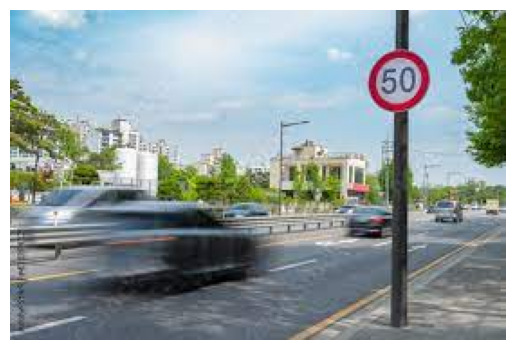

In [ ]:
# Loading an image
input_path = "Testing/27.jpeg"

if input_path.endswith((".jpg", ".jpeg", ".png")):
    image = cv2.imread(input_path)
    if image is not None:
        detected_sign = detect_and_classify_sign(image, clf)
        print("Detected sign:", detected_sign)

        plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
        plt.axis('off')
        plt.show()
    else:
        print("Failed to load the image.")
else:
    print("Unsupported file format. Please provide an image (jpg, jpeg, png).")